In [1]:
import pandas as pd 
import matplotlib. pyplot as plt 
import seaborn as sns
from matplotlib import style 
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score



In [2]:
df = pd.read_csv("/home/luo/projects/MDD/data/it-edi/train.tsv", sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8891 entries, 0 to 8890
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PID        8891 non-null   object
 1   Text_data  8891 non-null   object
 2   Label      8891 non-null   object
dtypes: object(3)
memory usage: 208.5+ KB


In [7]:
def data_preprocessing (text):
    if isinstance(text, float):
        text=''

    text = text.lower()
    text = re.sub(r"http\s+|www\S+http\S+", "",text,flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub("user",'',text)
    text = re.sub("url",'',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

/tmp/ipykernel_3353487/2718693830.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.text = df["Text_data"].apply(data_preprocessing)


<Axes: xlabel='Label', ylabel='count'>

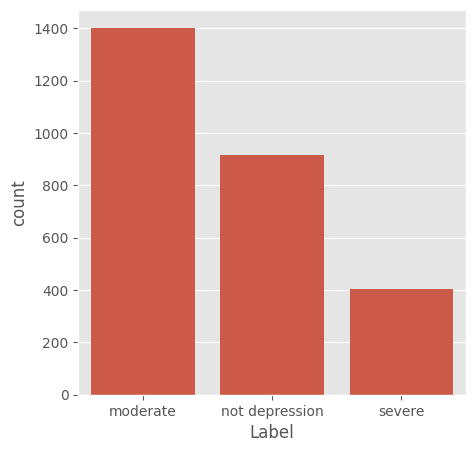

In [8]:

df.text = df["Text_data"].apply(data_preprocessing)
df = df.drop_duplicates('Text_data')
df['Label'].value_counts()
fig = plt.figure(figsize=(5,5))
sns.countplot(x = 'Label', data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

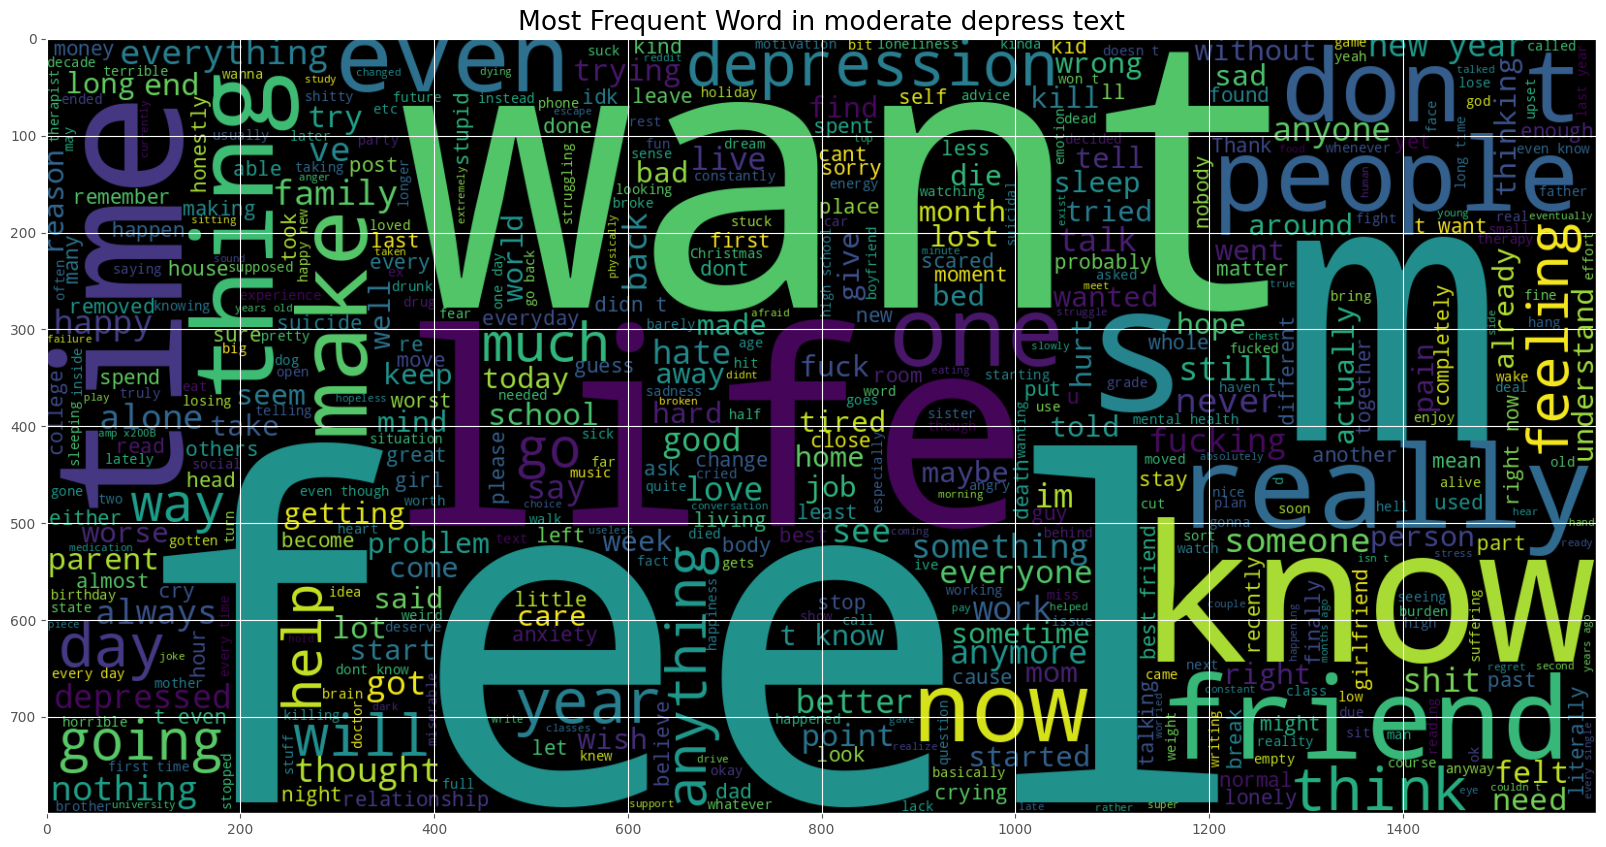

In [9]:
mo_depress_text = df[df.Label == 'moderate']
text = ' '.join([word for word in mo_depress_text['Text_data']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words= 500, width= 1600, height= 800).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Frequent Word in moderate depress text", fontsize = 19)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

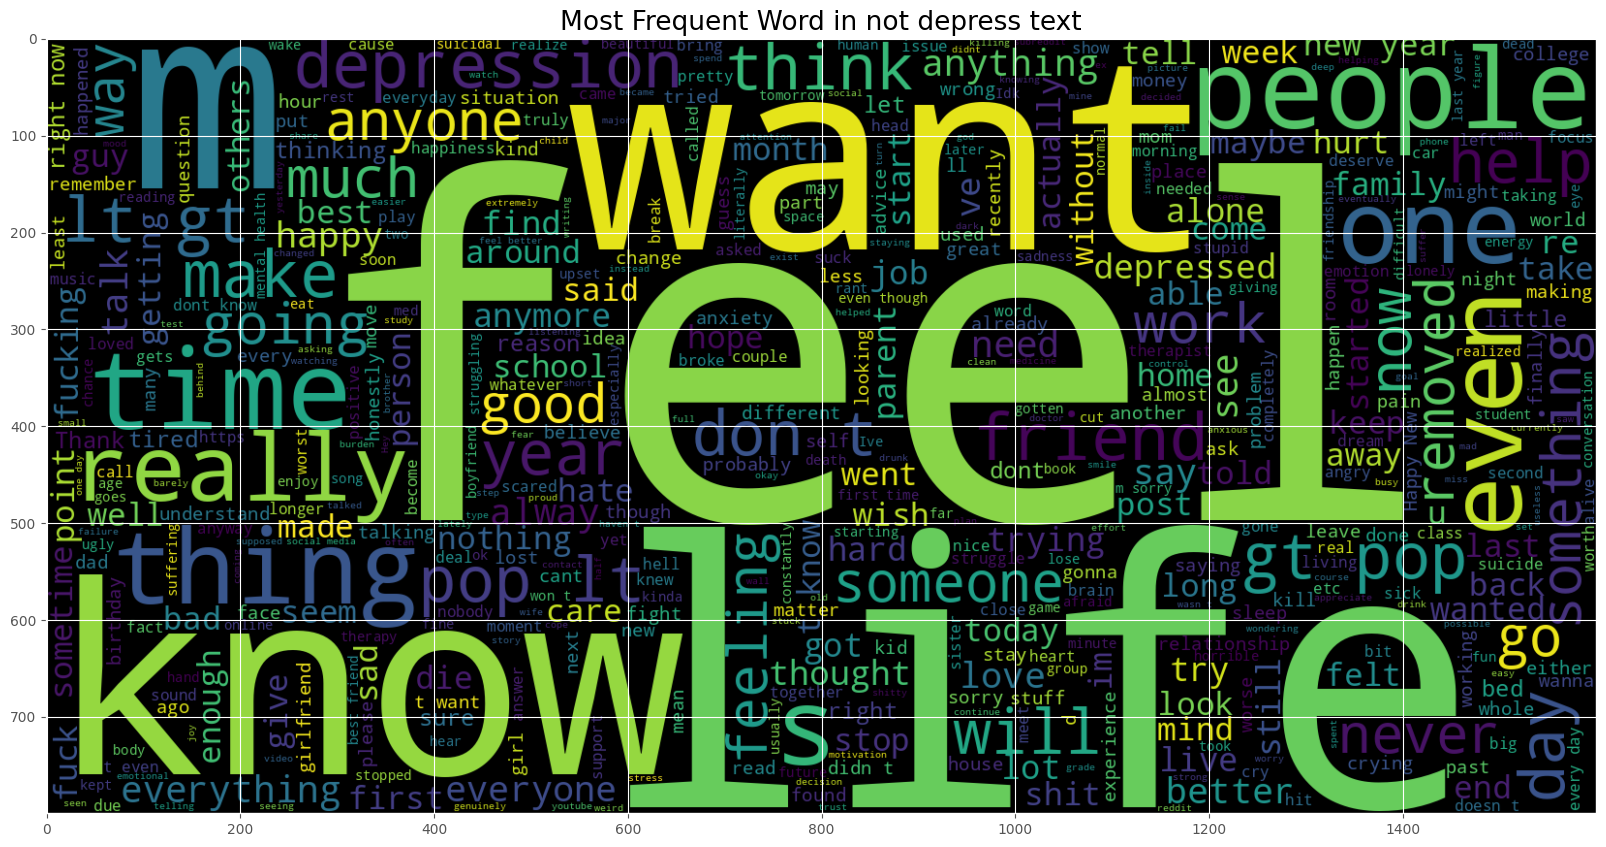

In [10]:
not_depress_text = df[df.Label == 'not depression']
text = ' '.join([word for word in not_depress_text['Text_data']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words= 500, width= 1600, height= 800).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Frequent Word in not depress text", fontsize = 19)
plt.show

In [11]:
vect = TfidfVectorizer(ngram_range = (1,2)).fit(df['Text_data'])
feature_names = vect.get_feature_names_out()
print('Number of features :{}\n'.format(len(feature_names)))
print('First 20 features: \n{}'.format(feature_names[:20]))

Number of features :150272

First 20 features: 
['00' '00 00' '00 47' '00 632' '00 because' '00 gonna' '00 including'
 '00 makes' '00 zero' '000' '000 000' '000 from' '000 is' '000 on'
 '000 or' '000 to' '000 whose' '000 worth' '00003' '00003 of']


In [12]:
X = df['Text_data']
Y = df['Label']
X = vect.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state= 42)

x_train = x_train[y_train.notna()]
y_train = y_train.dropna()

x_test = x_test[y_test.notna()]
y_test = y_test.dropna()

print(f'size of x_train {x_train.shape}')
print(f'size of y_train {y_train.shape}')
print(f'size of x_test {x_test.shape}')
print(f'size of y_test {y_test.shape}')

size of x_train (2176, 150272)
size of y_train (2176,)
size of x_test (544, 150272)
size of y_test (544,)


In [13]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
tree_predict = decision_tree.predict(x_test)
cm = classification_report(y_test,tree_predict)
print(cm)

                precision    recall  f1-score   support

      moderate       0.55      0.60      0.57       277
not depression       0.46      0.43      0.44       184
        severe       0.27      0.23      0.25        83

      accuracy                           0.49       544
     macro avg       0.43      0.42      0.42       544
  weighted avg       0.48      0.49      0.48       544



Turning